In [1]:
import pandas
from datetime import datetime
from pytz import utc
data = pandas.read_csv("reviews.csv", parse_dates=["Timestamp"])

### Rating Average/Count By Day

In [2]:
data["Day"] = data["Timestamp"].dt.date

In [3]:
data

,Course Name,Timestamp,Rating,Comment,Day
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02
...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01-01
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01-01
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01-01
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01-01


In [4]:
day_average = data.groupby(["Day"]).mean()

In [5]:
day_average

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077
...,...
2021-03-29,4.240000
2021-03-30,4.428571
2021-03-31,4.453125


In [6]:
import matplotlib.pyplot as plt

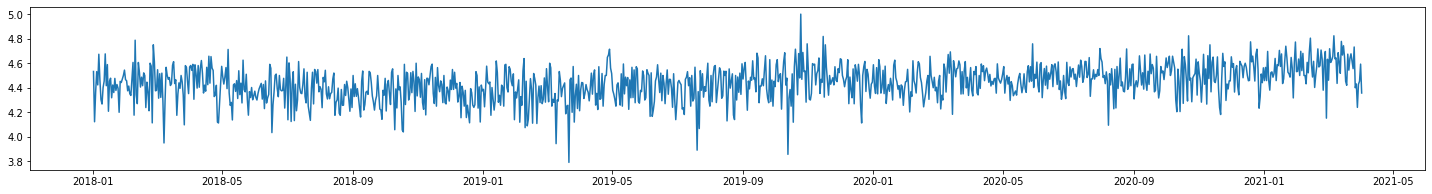

In [7]:
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average["Rating"])

### Rating average by week

In [8]:
data["Week"] = data["Timestamp"].dt.strftime("%Y-%U")
data["Week"]

0        2021-13
1        2021-13
2        2021-13
3        2021-13
4        2021-13
          ...   
44995    2018-00
44996    2018-00
44997    2018-00
44998    2018-00
44999    2018-00
Name: Week, Length: 45000, dtype: object

In [9]:
week_average = data.groupby(["Week"]).mean()
week_average

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


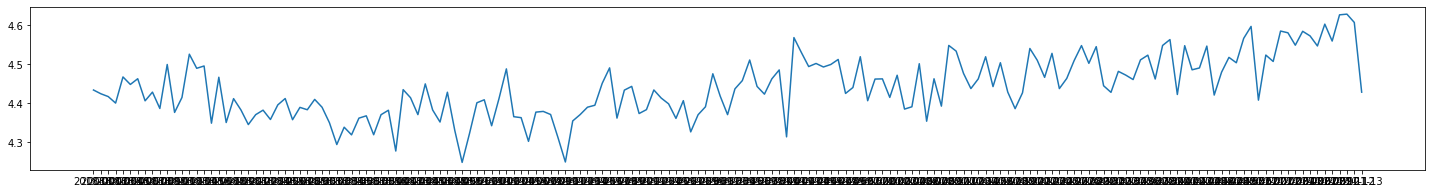

In [10]:
plt.figure(figsize=(25, 3))
plt.plot(week_average.index, week_average["Rating"])

### Rating average by month

pandas.core.frame.DataFrame

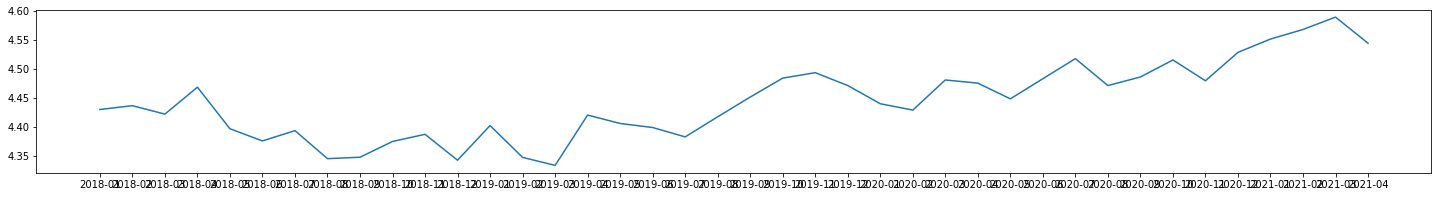

In [18]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m")
month_average = data.groupby(["Month"]).mean()

plt.figure(figsize=(25, 3))
plt.plot(month_average.index, month_average["Rating"])

### Average rating by month by course

In [12]:
# Repeating just to keep code together
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m")
month_average_courses = data.groupby(["Month", "Course Name"]).mean().unstack()
month_average_courses

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         
2018-06                                               4.268293         
2018-07                                               4.589286         
2018-08                                               4.353659         
2018-09                                               4.238636         
2018-10                                               4.106061         
2018-11                                               4.212766         
2018-12                                               4.405172         
2019-01                                               4.048780         
2019-02                                               4.333333         
2019-03                                               4.269231         
2019-04                                               4.365854         
2019-05                                               4.486111         
2019-06                                               4.442308         
2019-07                                               4.414634         
2019-08                                               4.222222         
2019-09                                               4.531250         
2019-10                                               4.287500         
2019-11                                               4.512195         
2019-12                                               4.152778         
2020-01                                               4.277778         
2020-02                                               4.200000         
2020-03                                               4.240000         
2020-04                                               4.329268         
2020-05                                               4.340909         
2020-06                                               4.397059         
2020-07                                               4.250000         
2020-08                                               4.121622         
2020-09                                               4.307692         
2020-10                                               4.366667         
2020-11                                               4.461538         
2020-12                                               4.294118         
2021-01                                               4.283333         
2021-02                                               4.450000         
2021-03                                               4.190476         
2021-04                                               4.500000         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11         

In [20]:
month_average_courses["Rating"]

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2018-01,4.353448,NaN,4.500000,4.285714,4.236842,4.355422,NaN,4.457368
2018-02,4.250000,NaN,4.205882,4.157895,4.437500,4.363095,NaN,4.481070
2018-03,4.500000,NaN,4.281250,4.266667,4.166667,4.357143,NaN,4.447037
2018-04,4.431034,NaN,4.468750,4.428571,4.250000,4.378947,NaN,4.507412
2018-05,4.358696,NaN,4.176471,4.107143,4.666667,4.362654,NaN,4.422085
2018-06,4.268293,NaN,4.631579,4.204545,4.333333,4.273876,NaN,4.421264
2018-07,4.589286,NaN,4.159091,4.065217,4.277778,4.330239,NaN,4.436156
2018-08,4.353659,NaN,4.411765,4.233333,4.100000,4.283388,NaN,4.376494
2018-09,4.238636,NaN,4.173913,4.500000,4.166667,4.247967,NaN,4.416413


<AxesSubplot:xlabel='Month'>

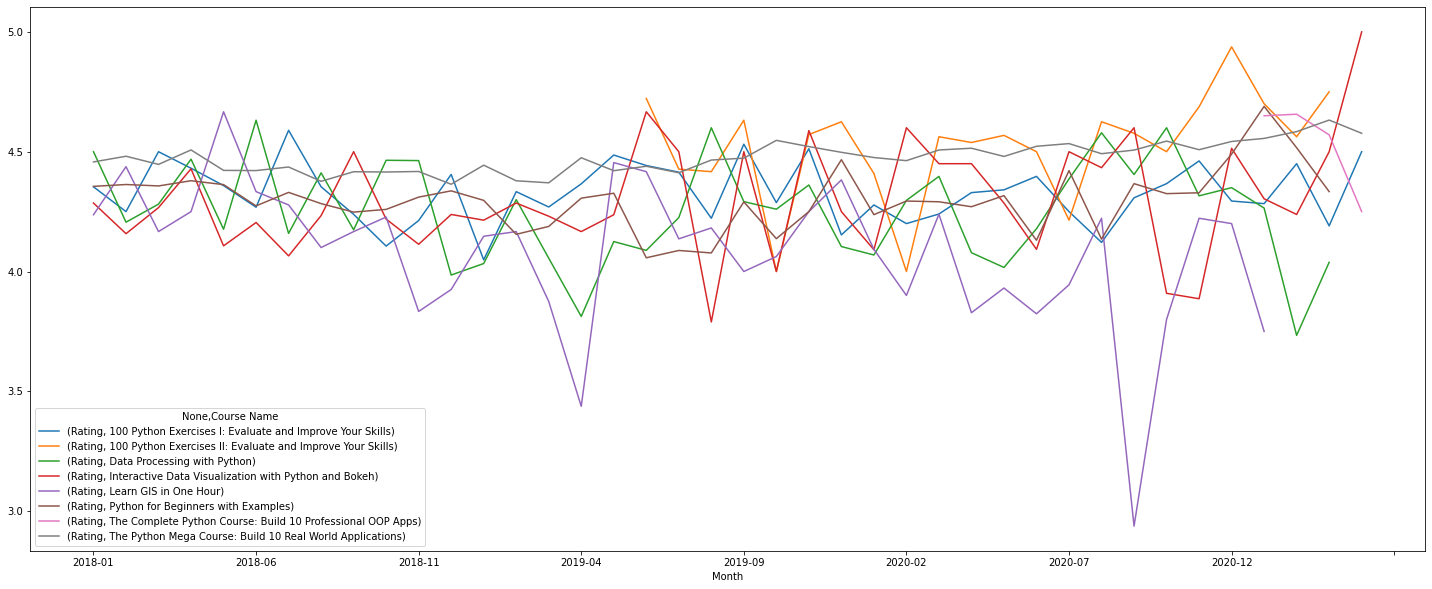

In [14]:
month_average_courses.plot(figsize=(25, 10))

### What day are people the happiest?

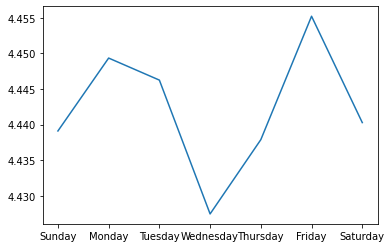

In [15]:
data["Weekday"] = data["Timestamp"].dt.strftime("%A")
data["Daynumber"] = data["Timestamp"].dt.strftime("%w")
weekday_average = data.groupby(["Weekday", "Daynumber"]).mean()
weekday_average = weekday_average.sort_values("Daynumber")
plt.plot(weekday_average.index.get_level_values(0), weekday_average["Rating"])